In [ ]:
# Unet with ResNet 34 for multiclass semantic segmentation
!pip install tensorflow==2.1.0

In [ ]:
!pip install segmentation-models

In [ ]:
# mount google drive here
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Fetch the training, validation and testing dataset
import os
import numpy as np

dataPath  = '/content/drive/My Drive/Underwater_Segmentation_Research/Data'

trainPath =  dataPath + '/Train'
testPath  =  dataPath + '/Test'
valPath   =  dataPath + '/Validate'

trainImgsFile   = 'trainingDataImgs.npy'
trainLabelsFile = 'trainingDataLabels.npy'

testImgsFile    = 'testingDataImgs.npy'
testLabelsFile  = 'testingDataLabels.npy'

valImgsFile     = 'validationDataImgs.npy'
valLabelsFile   = 'validationDataLabels.npy'

def getData(path,fileName):
  return np.load(path + "/" + fileName)

trainImgs = getData(trainPath, trainImgsFile)
trainLabels = getData(trainPath, trainLabelsFile)

testImgs   = getData(testPath, testImgsFile)
testLabels = getData(testPath, testLabelsFile)

valImgs    = getData(valPath, valImgsFile)
valLabels  = getData(valPath, valLabelsFile)

print("Got train, test and validation data")
print(trainImgs.shape, testImgs.shape, valImgs.shape)
print(trainLabels.shape, testLabels.shape, valLabels.shape)

In [ ]:
# Create the model (without pre-trained ImageNet weights)
# BATCH_SIZE = 16
# EPOCHS     = 20 (use early stopping as well to avoid overfitting (and store the epochs till then))
import os
import numpy as np
import segmentation_models as sm

# create the model
model = sm.Unet('resnet34', input_shape=(480, 320, 1), encoder_weights=None, classes=12, activation='softmax')
model.summary()


In [29]:
# Compile the model with loss function, optimizer and metric
import tensorflow as tf
LOSS=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(
    'Adam',
    loss='sparse_categorical_crossentropy',
    metrics=[sm.metrics.iou_score],
)

In [18]:
# Setup training parameters
BATCH = 16
EPOCHS = 30

# early stopping callback. It stops training when the loss does not change for 3 consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [30]:
# Start training the model

# change the label type to float32
# tf.cast(trainLabels, tf.float32)
# tf.cast(trainImgs, tf.float32)
# tf.cast(valLabels, tf.float32)
# tf.cast(valImgs, tf.float32)

history = model.fit(trainImgs, trainLabels, epochs=EPOCHS, batch_size=BATCH, validation_data=(valImgs, valLabels))

Train on 1000 samples, validate on 251 samples
Epoch 1/30
1000/1000 [==============================] - 61s 61ms/sample - loss: 0.6206 - iou_score: 0.0525 - val_loss: 0.6162 - val_iou_score: 0.0259
Epoch 2/30
1000/1000 [==============================] - 41s 41ms/sample - loss: 0.1383 - iou_score: 0.0617 - val_loss: 0.6449 - val_iou_score: 0.0266
Epoch 3/30
1000/1000 [==============================] - 41s 41ms/sample - loss: 0.1073 - iou_score: 0.0756 - val_loss: 0.5417 - val_iou_score: 0.0299
Epoch 4/30
1000/1000 [==============================] - 41s 41ms/sample - loss: 0.0919 - iou_score: 0.0798 - val_loss: 0.6726 - val_iou_score: 0.0585
Epoch 5/30
1000/1000 [==============================] - 41s 41ms/sample - loss: 0.0762 - iou_score: 0.0894 - val_loss: 0.2226 - val_iou_score: 0.0872
Epoch 6/30
1000/1000 [==============================] - 41s 41ms/sample - loss: 0.0671 - iou_score: 0.0960 - val_loss: 0.3933 - val_iou_score: 0.0822
Epoch 7/30
1000/1000 [==============================]

dict_keys(['loss', 'iou_score', 'val_loss', 'val_iou_score'])


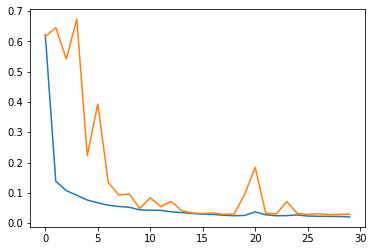

In [35]:
#  Plot the results

print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])print(history.history.keys())

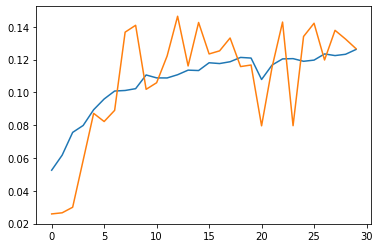

In [36]:
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])

In [37]:
model.evaluate(testImgs, testLabels)

617/617 [==============================] - 11s 17ms/sample - loss: 0.0256 - iou_score: 0.1268


[0.0256048204917672, 0.12681577]

In [42]:
# save the model weights
weightFileName = "UResNet34_30e_16b.h5"
weightPath = '/content/drive/My Drive/Underwater_Segmentation_Research/Weights/UNET'
model.save_weights(weightPath + "/" + weightFileName)


In [44]:
model.load_weights(weightPath + "/" + weightFileName)
model.evaluate(testImgs, testLabels)

617/617 [==============================] - 6s 10ms/sample - loss: 0.0256 - iou_score: 0.1268


[0.0256048204917672, 0.12681577]